### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2017]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2020]:
data = pd.read_csv('data/coupons.csv')

In [2022]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [2025]:
#missing_data = data[data.isnull().any(axis=1)]
#print(missing_data)
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [2028]:
#Initially, I planned to keep all null values, and replace them with meaningful data in hopes to keep accuracy. I encountered issues from the car column,
#where a majority of values were NaN. This was hampering my ability to clean and process the data in this set, so I made the call to remove this column,
#with minimal loss to data accuracy
data.drop(columns=['car'], inplace=True) 

#These functions allow me to process some of the data in a different way, specifically where the data is not uniform, or is in ranges
def convert_age(age):
    if 'plus' in age:
        return 51
    elif 'below' in age:
        return 20
    else:
        return int(age)

def convert_income(income):
    if income == 'Less than $12500':
        return 0
    elif income == '$12500 - $24999':
        return 1
    elif income == '$25000 - $37499':
        return 2
    elif income == '$37500 - $49999':
        return 3
    elif income == '$50000 - $62499':
        return 4
    elif income == '$62500 - $74999':
        return 5
    elif income == '$75000 - $87499':
        return 6
    elif income == '$87500 - $99999':
        return 7
    elif income == '$100000 or More':
        return 8
    else:
        return -1


data = data.dropna()

#some of the things I tried to do before deciding to drop all NaN(s)...
#data['CarryAway'] = data['CarryAway'].fillna('never')
#data['Bar'] = data['Bar'].fillna('never').replace('less1', 1)
#data['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
#data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never').replace('less1', 0)
#data['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')
#data = data.replace('never', 0)

#A typo in the dataset, corrected here.
data.rename(columns={'passanger': 'passenger'}, inplace=True)

#Additional data cleaning for the Age column, since we have either numbers or a label (such as plus or below), we will treat the numbers
#as numbers, or treat the labels as the +/- 1 of the label. After viewing all the values of the data, we only have to handle the plus50 and below21 cases
data['age'] = data['age'].apply(convert_age)

#Additional data cleaning for the income column. This data comes in ranges, so I've assigned them a numeric value to represent the range
data['income'] = data['income'].apply(convert_income)

4. What proportion of the total observations chose to accept the coupon?



In [2031]:
#Take the full length of the dataset
total_rows = len(data)

#Compare the # of accepted coupons against the total
general_acceptance = len(data[data['Y'] == 1]) / total_rows

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
accepted_5_min = len(data[data['toCoupon_GEQ5min'] == 1]) / total_rows
accepted_15_min = len(data[data['toCoupon_GEQ15min'] == 1]) / total_rows
accepted_25_min = len(data[data['toCoupon_GEQ25min'] == 1]) / total_rows

print(f"Overall acceptance of coupons = {general_acceptance * 100:.2f}%")
print(f"Accepted within 5 min distance = {accepted_5_min * 100:.2f}%")
print(f"Accepted within 15 min distance = {accepted_15_min * 100:.2f}%")
print(f"Accepted within 25 min distance = {accepted_25_min * 100:.2f}%")


Overall acceptance of coupons = 56.93%
Accepted within 5 min distance = 100.00%
Accepted within 15 min distance = 56.12%
Accepted within 25 min distance = 11.94%


5. Use a bar plot to visualize the `coupon` column.

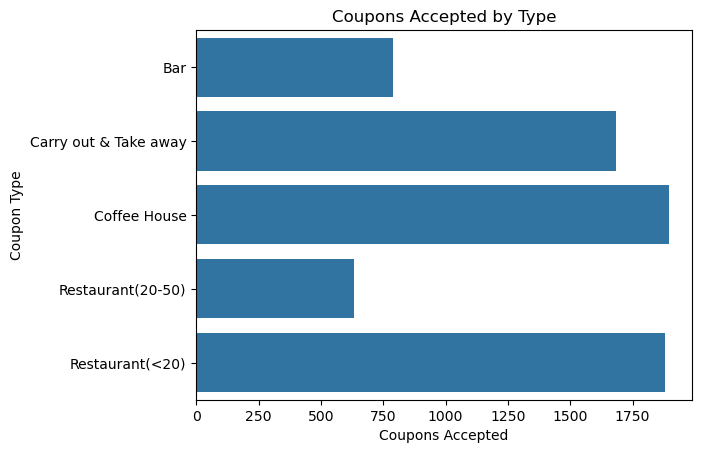

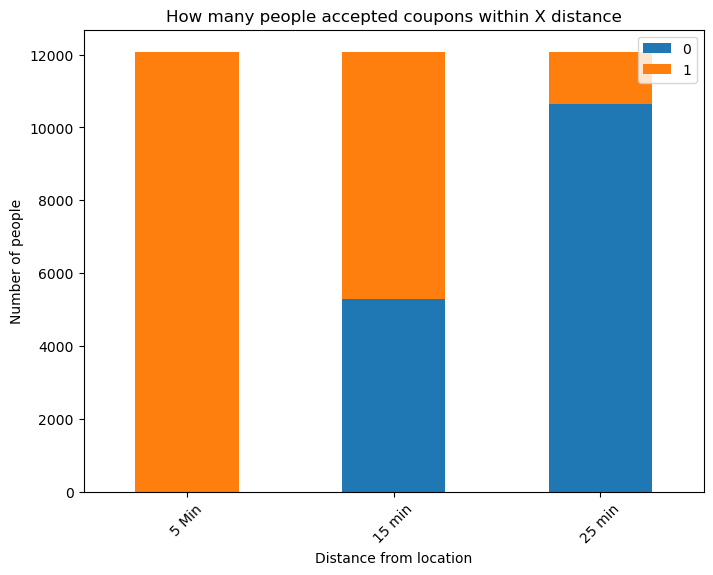

In [2034]:
coupons_accepted = data[data['Y'] == 1]
coupon_counts_by_type = coupons_accepted.groupby('coupon').size().reset_index(name='count')

sns.barplot(coupon_counts_by_type, x='count', y='coupon',order=np.sort(coupon_counts_by_type['coupon'].unique()), errorbar=None)
plt.title("Coupons Accepted by Type")
plt.xlabel('Coupons Accepted')
plt.ylabel('Coupon Type')
plt.savefig('images/coupons_bar_plot_by_destination')
plt.show()

counts = data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].apply(lambda x: x.value_counts().reindex([0,1], fill_value=0))
ax = counts.T.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xticklabels(['5 Min', '15 min', '25 min'], rotation = 45)
plt.title("How many people accepted coupons within X distance")
plt.xlabel("Distance from location")
plt.ylabel("Number of people")
plt.savefig('images/coupons_bar_plot_by_distance.png')
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

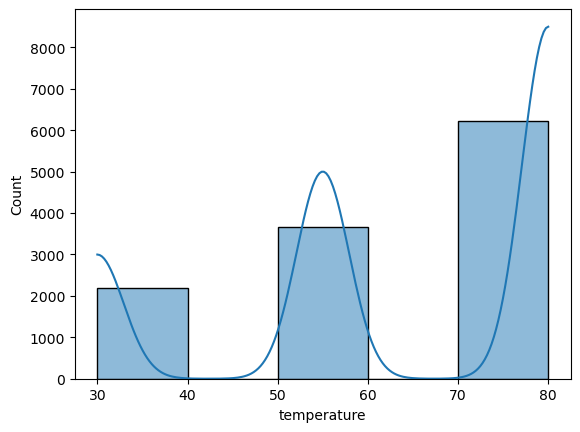

In [2036]:
sns.histplot(data['temperature'], bins=5, kde=True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [2039]:
just_bars = data[data['coupon'] == 'Bar'][['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']]
just_bars.head()

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min
24,1,0,0
35,1,0,0
39,1,1,1
46,1,0,0
57,1,0,0


2. What proportion of bar coupons were accepted?


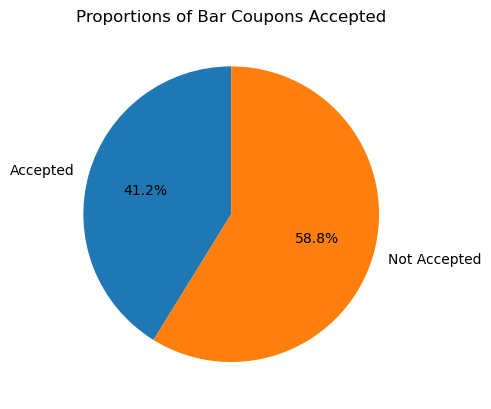

Overall bar coupons accepted = 41.19%
Bar coupons accepted within 5 min distance = 100.00%
Bar coupons accepted within 15 min distance = 66.23%
Bar coupons accepted within 25 min distance = 25.35%


In [2043]:
just_bars = data[data['coupon'] == 'Bar'][['Y', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']]
total_bar_rows = len(just_bars)

overall_accepted = len(just_bars[just_bars['Y'] == 1]) / total_bar_rows
labels=['Accepted', 'Not Accepted']

overall_vals = [overall_accepted, 1 - overall_accepted]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportions of Bar Coupons Accepted")
plt.savefig("images/proportions_bar_coupons_overall")
plt.show()

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
bar_5_min = len(just_bars[just_bars['toCoupon_GEQ5min'] == 1]) / total_bar_rows
bar_15_min = len(just_bars[just_bars['toCoupon_GEQ15min'] == 1]) / total_bar_rows
bar_25_min = len(just_bars[just_bars['toCoupon_GEQ25min'] == 1]) / total_bar_rows

print(f"Overall bar coupons accepted = {overall_accepted * 100:.2f}%")
print(f"Bar coupons accepted within 5 min distance = {bar_5_min * 100:.2f}%")
print(f"Bar coupons accepted within 15 min distance = {bar_15_min * 100:.2f}%")
print(f"Bar coupons accepted within 25 min distance = {bar_25_min * 100:.2f}%")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


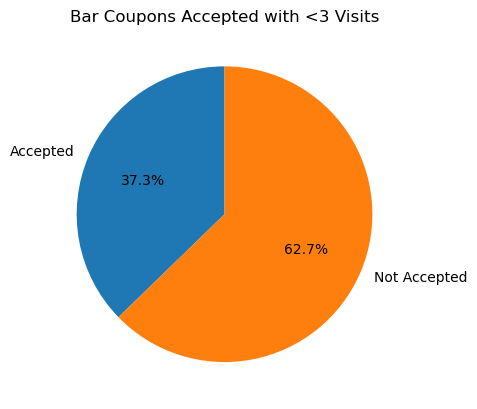

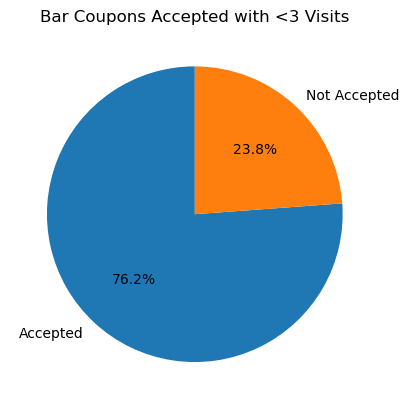

Overall bar coupons accepted where person had less than 3 visits = 37.27% vs more than 3 visits = 76.17%
Bar coupons accepted within 5 min distance: Less than 3 visits = 100.00% vs more than 3 visits = 100.00%
Bar coupons accepted within 15 min distance: Less than 3 visits = 67.03% vs more than 3 visits = 59.07%
Bar coupons accepted within 25 min distance: Less than 3 visits = 25.47% vs more than 3 visits = 24.35%


In [2046]:
just_bars = data[data['coupon'] == 'Bar'][['Y', 'Bar','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']]
total_bar_coupon_accepted = len(just_bars[just_bars['Y'] == 1])

#This probably could have been simplified, however seeing all the raw functionality instead of just querying the data shows the true power of data processing
bar_with_less_than_3_visits = len(just_bars[(just_bars['Y'] == 1) & (just_bars['Bar'].isin(["never", "less1", "1~3"]))]) / len(just_bars[just_bars['Bar'].isin(["never", "less1", "1~3"])])
bar_with_more_than_3_visits = len(just_bars[(just_bars['Y'] == 1) & (just_bars['Bar'].isin(["4~8", "gt8"]))]) / len(just_bars[just_bars['Bar'].isin(["4~8", "gt8"])])

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
bar_5_min_less_than_3_visits = len(just_bars[(just_bars['toCoupon_GEQ5min'] == 1) & (just_bars['Bar'].isin(["never", "less1", "1~3"]))]) / len(just_bars[just_bars['Bar'].isin(["never", "less1", "1~3"])])
bar_5_min_more_than_3_visits = len(just_bars[(just_bars['toCoupon_GEQ5min'] == 1) & (just_bars['Bar'].isin(["4~8", "gt8"]))]) / len(just_bars[just_bars['Bar'].isin(["4~8", "gt8"])])

bar_15_min_less_than_3_visits = len(just_bars[(just_bars['toCoupon_GEQ15min'] == 1) & (just_bars['Bar'].isin(["never", "less1", "1~3"]))]) / len(just_bars[just_bars['Bar'].isin(["never", "less1", "1~3"])])
bar_15_min_more_than_3_visits = len(just_bars[(just_bars['toCoupon_GEQ15min'] == 1) & (just_bars['Bar'].isin(["4~8", "gt8"]))]) / len(just_bars[just_bars['Bar'].isin(["4~8", "gt8"])])

bar_25_min_less_than_3_visits = len(just_bars[(just_bars['toCoupon_GEQ25min'] == 1) & (just_bars['Bar'].isin(["never", "less1", "1~3"]))]) / len(just_bars[just_bars['Bar'].isin(["never", "less1", "1~3"])])
bar_25_min_more_than_3_visits = len(just_bars[(just_bars['toCoupon_GEQ25min'] == 1) & (just_bars['Bar'].isin(["4~8", "gt8"]))]) / len(just_bars[just_bars['Bar'].isin(["4~8", "gt8"])])

overall_vals = [bar_with_less_than_3_visits, 1 - bar_with_less_than_3_visits]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Bar Coupons Accepted with <3 Visits")
plt.savefig("images/proportions_bar_coupons_less_than_3_visits")
plt.show()

overall_vals = [bar_with_more_than_3_visits, 1 - bar_with_more_than_3_visits]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Bar Coupons Accepted with <3 Visits")
plt.savefig("images/proportions_bar_coupons_more_than_3_visits")
plt.show()

print(f"Overall bar coupons accepted where person had less than 3 visits = {bar_with_less_than_3_visits * 100:.2f}% vs more than 3 visits = {bar_with_more_than_3_visits * 100:.2f}%")
print(f"Bar coupons accepted within 5 min distance: Less than 3 visits = {bar_5_min_less_than_3_visits * 100:.2f}% vs more than 3 visits = {bar_5_min_more_than_3_visits * 100:.2f}%")
print(f"Bar coupons accepted within 15 min distance: Less than 3 visits = {bar_15_min_less_than_3_visits * 100:.2f}% vs more than 3 visits = {bar_15_min_more_than_3_visits * 100:.2f}%")
print(f"Bar coupons accepted within 25 min distance: Less than 3 visits = {bar_25_min_less_than_3_visits * 100:.2f}% vs more than 3 visits = {bar_25_min_more_than_3_visits * 100:.2f}%")



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


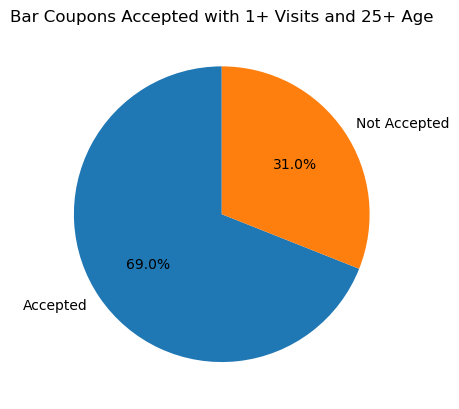

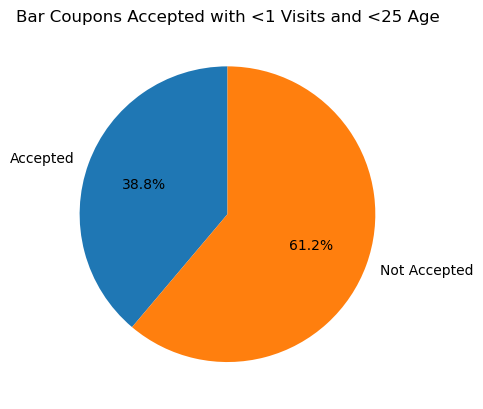

Bar coupons accepted with atleast 1 visit and over the age of 25: 68.98%
Bar coupons accepted with under 1 visit and under the age of 25: 38.83%
Bar coupons accepted within 5 min distance with atleast 1 visit and over the age of 25: 100.00%
Bar coupons accepted within 15 min distance with atleast 1 visit and over the age of 25: 65.76%
Bar coupons accepted within 25 min distance with atleast 1 visit and over the age of 25: 22.83%


In [2049]:
just_bars = data[data['coupon'] == 'Bar'][['Y', 'age','Bar','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']]

bar_with_more_than_once_and_over_age_25 = len(just_bars[(just_bars['Y'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)])
bar_with_less_than_once_and_under_age_25 = len(just_bars[(just_bars['Y'] == 1) & (~just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] <= 25)]) / len(just_bars[(~just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] <= 25)])

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
bar_5_min_more_than_once_and_over_age_25 = len(just_bars[(just_bars['toCoupon_GEQ5min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)])
bar_15_min_more_than_once_and_over_age_25 = len(just_bars[(just_bars['toCoupon_GEQ15min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)])
bar_25_min_more_than_once_and_over_age_25 = len(just_bars[(just_bars['toCoupon_GEQ25min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] > 25)])

overall_vals = [bar_with_more_than_once_and_over_age_25, 1 - bar_with_more_than_once_and_over_age_25]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Bar Coupons Accepted with 1+ Visits and 25+ Age")
plt.savefig("images/proportions_bar_coupons_more_than_1_visit_over_25")
plt.show()

overall_vals = [bar_with_less_than_once_and_under_age_25, 1 - bar_with_less_than_once_and_under_age_25]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Bar Coupons Accepted with <1 Visits and <25 Age")
plt.savefig("images/proportions_bar_coupons_less_than_1_visit_under_25")
plt.show()



print(f"Bar coupons accepted with atleast 1 visit and over the age of 25: {bar_with_more_than_once_and_over_age_25 * 100:.2f}%")
print(f"Bar coupons accepted with under 1 visit and under the age of 25: {bar_with_less_than_once_and_under_age_25 * 100:.2f}%")
print(f"Bar coupons accepted within 5 min distance with atleast 1 visit and over the age of 25: {bar_5_min_more_than_once_and_over_age_25 * 100:.2f}%")
print(f"Bar coupons accepted within 15 min distance with atleast 1 visit and over the age of 25: {bar_15_min_more_than_once_and_over_age_25 * 100:.2f}%")
print(f"Bar coupons accepted within 25 min distance with atleast 1 visit and over the age of 25: {bar_25_min_more_than_once_and_over_age_25 * 100:.2f}%")
                                              


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


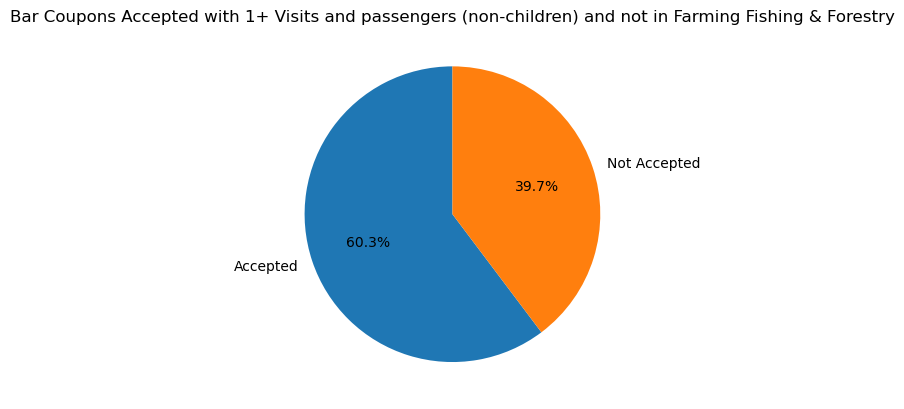

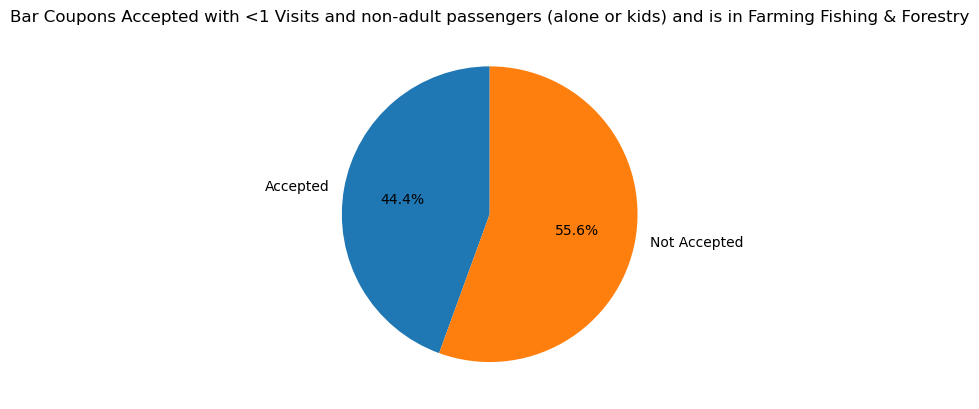

Bar coupons accepted with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: 60.27%
Bar coupons accepted with less than 1 visit, had a non-child passenger (or alone), and is in farming, fishing, or forestry: 44.44%
Bar coupons accepted within 5 min distance with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: 100.00%
Bar coupons accepted within 15 min distance with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: 100.00%
Bar coupons accepted within 25 min distance with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: 100.00%


In [2052]:
just_bars = data[data['coupon'] == 'Bar'][['Y', 'occupation', 'passenger','age','Bar','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']]

bar_more_than_once_and_had_no_child_passengers = len(just_bars[(just_bars['Y'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')])
bar_less_than_once_and_had_non_adult_passengers = len(just_bars[(just_bars['Y'] == 1) & (~just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['occupation'] == 'Farming Fishing & Forestry')]) / len(just_bars[(~just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['occupation'] == 'Farming Fishing & Forestry')])

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
bar_5_min_more_than_once_and_had_no_child_passengers = len(just_bars[(just_bars['toCoupon_GEQ5min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(['Kid(s)','Alone'])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(['Kid(s)','Alone'])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')])
bar_15_min_more_than_once_and_had_no_child_passengers = len(just_bars[(just_bars['toCoupon_GEQ15min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(['Kid(s)','Alone'])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(['Kid(s)','Alone'])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')])
bar_25_min_more_than_once_and_had_no_child_passengers = len(just_bars[(just_bars['toCoupon_GEQ25min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(['Kid(s)','Alone'])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (~just_bars['passenger'].isin(['Kid(s)','Alone'])) & (just_bars['occupation'] != 'Farming Fishing & Forestry')])

overall_vals = [bar_more_than_once_and_had_no_child_passengers, 1 - bar_more_than_once_and_had_no_child_passengers]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Bar Coupons Accepted with 1+ Visits and passengers (non-children) and not in Farming Fishing & Forestry")
plt.savefig("images/proportions_bar_coupons_more_than_1_visit_no_children_passengers_fff")
plt.show()

overall_vals = [bar_less_than_once_and_had_non_adult_passengers, 1 - bar_less_than_once_and_had_non_adult_passengers]
plt.pie(overall_vals, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Bar Coupons Accepted with <1 Visits and non-adult passengers (alone or kids) and is in Farming Fishing & Forestry")
plt.savefig("images/proportions_bar_coupons_less_than_1_visit_no_adult_passengers_fff")
plt.show()

print(f"Bar coupons accepted with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: {bar_more_than_once_and_had_no_child_passengers * 100:.2f}%")
print(f"Bar coupons accepted with less than 1 visit, had a non-child passenger (or alone), and is in farming, fishing, or forestry: {bar_less_than_once_and_had_non_adult_passengers * 100:.2f}%")
print(f"Bar coupons accepted within 5 min distance with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: {bar_5_min_more_than_once_and_had_no_child_passengers * 100:.2f}%")
print(f"Bar coupons accepted within 15 min distance with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: {bar_5_min_more_than_once_and_had_no_child_passengers * 100:.2f}%")
print(f"Bar coupons accepted within 25 min distance with atleast 1 visit, has a non-child passenger, and is not in farming, fishing, or forestry: {bar_5_min_more_than_once_and_had_no_child_passengers * 100:.2f}%")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [2055]:
just_bars = data[data['coupon'] == 'Bar'][['Y', 'maritalStatus','RestaurantLessThan20', 'income', 'occupation', 'passenger','age','Bar','toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']]
bar_more_than_once_and_had_no_child_passengers_and_not_widowed = len(just_bars[(just_bars['Y'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')])

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
bar_5_min_more_than_once_and_had_no_child_passengers_and_not_widowed = len(just_bars[(just_bars['toCoupon_GEQ5min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')])
bar_15_min_more_than_once_and_had_no_child_passengers_and_not_widowed = len(just_bars[(just_bars['toCoupon_GEQ15min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')])
bar_25_min_more_than_once_and_had_no_child_passengers_and_not_widowed = len(just_bars[(just_bars['toCoupon_GEQ25min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['passenger'].isin(["Friends(s)", "Partner"])) & (just_bars['maritalStatus'] != 'Widowed')])


In [2057]:
bar_more_than_once_and_age_less_than_30 = len(just_bars[(just_bars['Y'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)])

#Additional info, such as seeing the rate of acceptance based on the distance away from the destination
bar_5_min_more_than_once_and_age_less_than_30 = len(just_bars[(just_bars['toCoupon_GEQ5min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)])
bar_15_min_more_than_once_and_age_less_than_30 = len(just_bars[(just_bars['toCoupon_GEQ15min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)])
bar_25_min_more_than_once_and_age_less_than_30 =  len(just_bars[(just_bars['toCoupon_GEQ25min'] == 1) & (just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)]) / len(just_bars[(just_bars['Bar'].isin(["1~3", "4~8", "gt8"])) & (just_bars['age'] < 30)])


In [2059]:
bar_income_less_than_50k_cheap_restaurants_more_than_4 = len(just_bars[(just_bars['Y'] == 1) & (just_bars['RestaurantLessThan20'].isin(["4~8", "gt8"])) & (just_bars['income'] < 4)]) / len(just_bars[(just_bars['RestaurantLessThan20'].isin(["4~8", "gt8"])) & (just_bars['income'] < 4)])

Group A represents Bar Coupons Accepted with 1+ Visits, Passengers (no children), and not Widowed
Group B represents Bar Coupons Accepted with 1+ visits, and under the age of 30
Group C represents Bar Coupons Accepted while making less than 50k Income, and Visits Cheap Restaurants


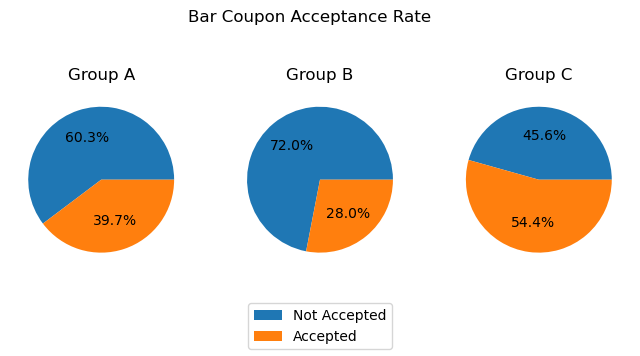

Bar coupons accepted with atleast 1 visit, has a non-child passenger, and is not widowed: 60.27%
Bar coupons accepted within 5 min distance with atleast 1 visit, has a non-child passenger, and is not widowed: 100.00%
Bar coupons accepted within 15 min distance with atleast 1 visit, has a non-child passenger, and is not widowed: 78.08%
Bar coupons accepted within 25 min distance with atleast 1 visit, has a non-child passenger, and is not widowed: 12.33%


Bar coupons accepted with atleast 1 visit, and under the age of 30: 71.95%
Bar coupons accepted within 5 min distance with atleast 1 visit, and under the age of 30: 100.00%
Bar coupons accepted within 15 min distance with atleast 1 visit, and under the age of 30: 62.50%
Bar coupons accepted within 25 min distance with atleast 1 visit, and under the age of 30: 25.00%


Bar coupons accepted while making less than 50k, and visits 'cheap' restaurants 4 or more times: 45.65%


In [2061]:
overall_vals_1 = [bar_more_than_once_and_had_no_child_passengers_and_not_widowed, 1 - bar_more_than_once_and_had_no_child_passengers_and_not_widowed]
overall_vals_2 = [bar_more_than_once_and_age_less_than_30, 1 - bar_more_than_once_and_age_less_than_30]
overall_vals_3 = [bar_income_less_than_50k_cheap_restaurants_more_than_4, 1 - bar_income_less_than_50k_cheap_restaurants_more_than_4]

print("Group A represents Bar Coupons Accepted with 1+ Visits, Passengers (no children), and not Widowed")
print("Group B represents Bar Coupons Accepted with 1+ visits, and under the age of 30")
print("Group C represents Bar Coupons Accepted while making less than 50k Income, and Visits Cheap Restaurants")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3.5))
pie1 = axes[0].pie(overall_vals_1, autopct="%1.1f%%")
pie2 = axes[1].pie(overall_vals_2, autopct="%1.1f%%")
pie3 = axes[2].pie(overall_vals_3, autopct="%1.1f%%")
axes[0].set_title(label="Group A")
axes[1].set_title(label="Group B")
axes[2].set_title(label="Group C")
fig.suptitle("Bar Coupon Acceptance Rate")
fig.legend(('Not Accepted','Accepted'), loc="lower center")
plt.savefig("images/bar_coupons_accepted_by_various_groups")
plt.show()

print(f"Bar coupons accepted with atleast 1 visit, has a non-child passenger, and is not widowed: {bar_more_than_once_and_had_no_child_passengers_and_not_widowed * 100:.2f}%")
print(f"Bar coupons accepted within 5 min distance with atleast 1 visit, has a non-child passenger, and is not widowed: {bar_5_min_more_than_once_and_had_no_child_passengers_and_not_widowed * 100:.2f}%")
print(f"Bar coupons accepted within 15 min distance with atleast 1 visit, has a non-child passenger, and is not widowed: {bar_15_min_more_than_once_and_had_no_child_passengers_and_not_widowed * 100:.2f}%")
print(f"Bar coupons accepted within 25 min distance with atleast 1 visit, has a non-child passenger, and is not widowed: {bar_25_min_more_than_once_and_had_no_child_passengers_and_not_widowed * 100:.2f}%")
print("\n")

print(f"Bar coupons accepted with atleast 1 visit, and under the age of 30: {bar_more_than_once_and_age_less_than_30 * 100:.2f}%")
print(f"Bar coupons accepted within 5 min distance with atleast 1 visit, and under the age of 30: {bar_5_min_more_than_once_and_age_less_than_30 * 100:.2f}%")
print(f"Bar coupons accepted within 15 min distance with atleast 1 visit, and under the age of 30: {bar_15_min_more_than_once_and_age_less_than_30 * 100:.2f}%")
print(f"Bar coupons accepted within 25 min distance with atleast 1 visit, and under the age of 30: {bar_25_min_more_than_once_and_age_less_than_30 * 100:.2f}%")
print("\n")

print(f"Bar coupons accepted while making less than 50k, and visits 'cheap' restaurants 4 or more times: {bar_more_than_once_and_income_less_than_50k_cheap_restaurants_more_than_4 * 100:.2f}%")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the data presented, we can make a basic conclusion that drivers who already visited these bars accepted the coupon more readily than those who either do not go, or did not go as frequently to bars. This makes sense, as if you are a regular to an establishment, then getting a discount is a bonus (and would not have changed your decision to go there). On the other hand, if you aren't keen on going to a bar, or you just don't go often, then accepting a coupon is more of a neutral gain (or even negative if you are wildly indecisive), as you either don't go to bars often, or don't really like them.

There are other factors as well, such as if you have a kid with you (probably not the best place to take a child), are alone (and would rather go with company), are busy from your job, or even the fact that you are just trying to save money (and bars can be expensive!). We only scratched the surface with this data, and it would be amazing to tie in all the various factors to really boil down the numbers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I think an interesting factor that comes into play is the distance away from the place the coupon is available for.

### Investigating this phenomenon

From the get-go, I hypothesize (and abstract away from the data I've already looked at) that the further away the distance, the less likely someone is to accept the coupon. Additionally, if it is in the other direction, or perhaps the passengers with the driver are a bit mismatched, then this will further drive down the acceptance rate.

To start, I wanted to see how each coupon type did for each distance compared to the overall, so I set up that data and plotted it.

In [2068]:
#Bar
just_bars = data[(data['coupon'] == 'Bar')]
total_bar_rows = len(just_bars)

overall_bar_acceptance = len(just_bars[(just_bars['Y'] == 1)])
bar_acceptance_5_min = len(just_bars[just_bars['toCoupon_GEQ5min'] == 1])
bar_acceptance_15_min = len(just_bars[just_bars['toCoupon_GEQ15min'] == 1])
bar_acceptance_25_min = len(just_bars[just_bars['toCoupon_GEQ25min'] == 1])

#CarryAway
just_takeout = data[(data['coupon'] == 'Carry out & Take away')]
total_takeout_rows = len(just_takeout)

overall_takeout_acceptance = len(just_takeout[(just_takeout['Y'] == 1)])
takeout_acceptance_5_min = len(just_takeout[just_takeout['toCoupon_GEQ5min'] == 1])
takeout_acceptance_15_min = len(just_takeout[just_takeout['toCoupon_GEQ15min'] == 1])
takeout_acceptance_25_min = len(just_takeout[just_takeout['toCoupon_GEQ25min'] == 1])

#CoffeeHouse
just_coffee = data[(data['coupon'] == 'Coffee House')]
total_coffee_rows = len(just_coffee)
print(total_coffee_rows)

overall_coffee_acceptance = len(just_coffee[(just_coffee['Y'] == 1)])
coffee_acceptance_5_min = len(just_coffee[just_coffee['toCoupon_GEQ5min'] == 1])
print(coffee_acceptance_5_min)
coffee_acceptance_15_min = len(just_coffee[just_coffee['toCoupon_GEQ15min'] == 1])
coffee_acceptance_25_min = len(just_coffee[just_coffee['toCoupon_GEQ25min'] == 1])
print(coffee_acceptance_25_min)

#Restaurant20To50
just_restaurant_2050 = data[(data['coupon'] == 'Restaurant(20-50)')]
total_rest2050_rows = len(just_restaurant_2050)

overall_rest2050_acceptance = len(just_restaurant_2050[(just_restaurant_2050['Y'] == 1)])
rest2050_acceptance_5_min = len(just_restaurant_2050[just_restaurant_2050['toCoupon_GEQ5min'] == 1])
rest2050_acceptance_15_min = len(just_restaurant_2050[just_restaurant_2050['toCoupon_GEQ15min'] == 1])
rest2050_acceptance_25_min = len(just_restaurant_2050[just_restaurant_2050['toCoupon_GEQ25min'] == 1])

#RestaurantLessThan20
just_restaurant_lt20 = data[(data['coupon'] == 'Restaurant(<20)')]
total_restlt20_rows = len(just_restaurant_lt20)

overall_restlt20_acceptance = len(just_restaurant_lt20[(just_restaurant_lt20['Y'] == 1)])
restlt20_acceptance_5_min = len(just_restaurant_lt20[just_restaurant_lt20['toCoupon_GEQ5min'] == 1])
restlt20_acceptance_15_min = len(just_restaurant_lt20[just_restaurant_lt20['toCoupon_GEQ15min'] == 1])
restlt20_acceptance_25_min = len(just_restaurant_lt20[just_restaurant_lt20['toCoupon_GEQ25min'] == 1])

coupons_by_distance = {
    'Coupon Type': ['Bar', 'Takeout', 'Coffee House', 'Restaurant (20-50)', 'Restaurant (<20)'],
    'Overall' : [overall_bar_acceptance, overall_takeout_acceptance, overall_coffee_acceptance, overall_rest2050_acceptance, overall_restlt20_acceptance],
    '5 Min': [bar_acceptance_5_min, takeout_acceptance_5_min, coffee_acceptance_5_min, rest2050_acceptance_5_min, restlt20_acceptance_5_min],
    '15 Min': [bar_acceptance_15_min, takeout_acceptance_5_min, coffee_acceptance_15_min, rest2050_acceptance_15_min, restlt20_acceptance_15_min],
    '25 Min': [bar_acceptance_25_min, takeout_acceptance_25_min, coffee_acceptance_25_min, rest2050_acceptance_25_min, restlt20_acceptance_25_min]
}

3816
3816
298


Now that we've got the data, we can start visualizing some of it.

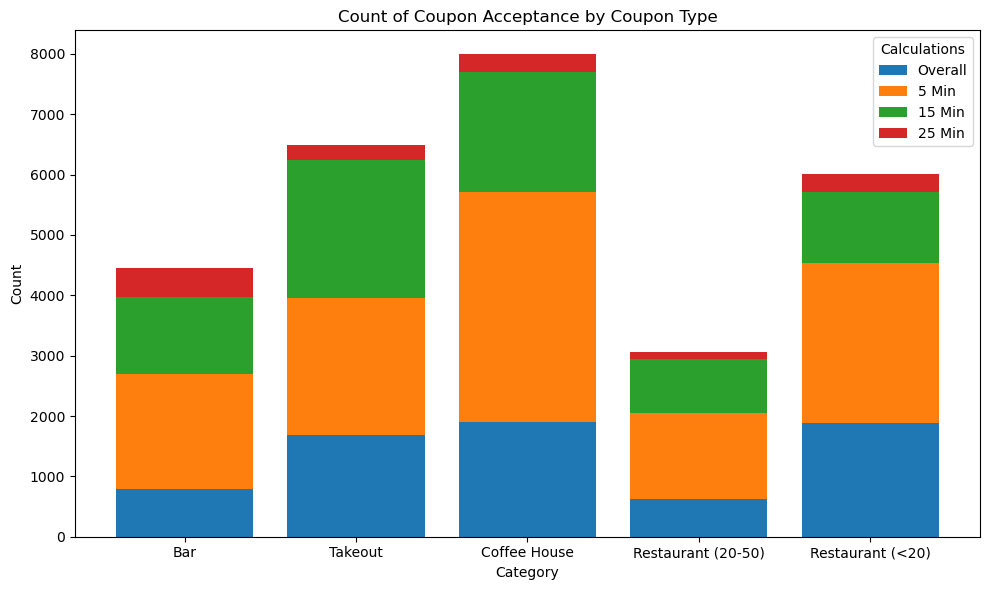

In [2071]:
df = pd.DataFrame(coupons_by_distance)
fig, ax = plt.subplots(figsize=(10, 6))
categories = df['Coupon Type']
calculations = df.columns[1:]
bottom = None

for calc in calculations:
    ax.bar(categories,df[calc],label=calc,bottom=bottom)
    bottom = df[calc] if bottom is None else bottom + df[calc]

ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Count of Coupon Acceptance by Coupon Type')
ax.legend(title='Calculations')
plt.tight_layout()

plt.savefig('images/coupon_acceptance_by_type_by_distance')
plt.show()

A general guess about this data is that there will always (very broad assumption) be people who will accept a coupon, which is represented by the overall count. However, we can clearly see that as the distance increases (5 min, 15 min, 25 min), people are less likely to accept a coupon as they have to go further out of there way. A countering factor may be their own enjoyment of the category (for example, if you were a coffee lover, you'd be more inclined to travel further for coffee). As expected, 25 minutes may be too far to care about accepting a coupon. The sweet spot is 5 minutes, since you are basically already there.

But what happens if we start to inject more factors? What if it's the opposite way? What if its later in the day, or its too hot outside? Let's take a look at how that affects our analysis, and I'll be focusing on the most popular category, coffee.

For this section, I'm going to start by adding in three variables, how often they go to a coffee shop, and what time and temperature it is. I'll also be looking at the 25 minute mark just to see how much it affects it.

I'll start by preparing some data.

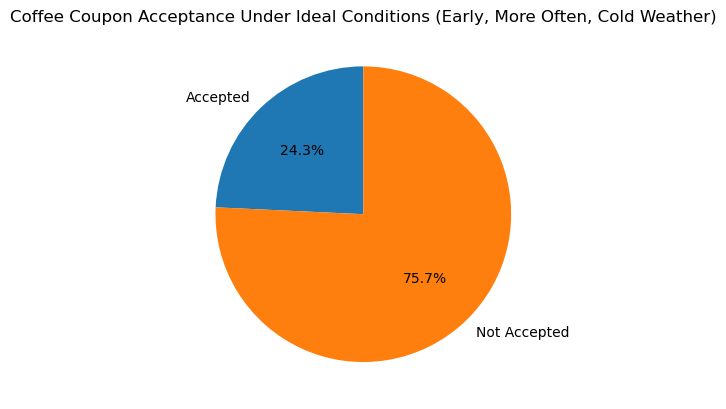

Text(0.5, 1.0, 'Coffee Coupon Acceptance Under Suboptimal Conditions (Late, Less Often, Hot Weather)')

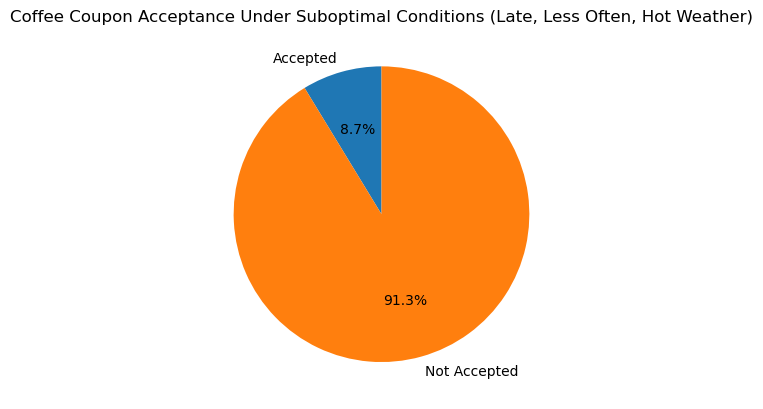

In [2073]:
#Coffee House
coffee_acceptance_more_often_early_cold = len(just_coffee[(just_coffee['toCoupon_GEQ25min'] == 1) & (just_coffee['temperature'] <= 55) & (just_coffee['CoffeeHouse'].isin(['4~8', 'gt8'])) & (just_coffee['time'].isin(['7AM','10AM']))]) / len(just_coffee[(just_coffee['temperature'] <= 55) & (just_coffee['CoffeeHouse'].isin(['4~8', 'gt8'])) & (just_coffee['time'].isin(['7AM','10AM']))])
coffee_acceptance_less_often_late_hot = len(just_coffee[(just_coffee['toCoupon_GEQ25min'] == 1) & (just_coffee['temperature'] > 55) & (just_coffee['CoffeeHouse'].isin(['never', 'less1', '1~3'])) & (just_coffee['time'].isin(['2PM','6PM','10PM']))]) / len(just_coffee[(just_coffee['temperature'] > 55) & (just_coffee['CoffeeHouse'].isin(['never', 'less1', '1~3'])) & (just_coffee['time'].isin(['2PM','6PM','10PM']))])

coffee_acceptance_ideal = [coffee_acceptance_more_often_early_cold, 1 - coffee_acceptance_more_often_early_cold]
coffee_acceptance_unoptimal = [coffee_acceptance_less_often_late_hot, 1 - coffee_acceptance_less_often_late_hot]

plt.pie(coffee_acceptance_ideal, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Coffee Coupon Acceptance Under Ideal Conditions (Early, More Often, Cold Weather)")
plt.savefig("images/pie_chart_coffee_25_min_ideal")
plt.show()

plt.pie(coffee_acceptance_unoptimal, labels=labels, autopct='%1.1f%%', startangle=90)
plt.savefig("images/pie_chart_coffee_25_min_unoptimal")
plt.title("Coffee Coupon Acceptance Under Suboptimal Conditions (Late, Less Often, Hot Weather)")

As expected, less people accepted the coupon under unoptimal conditions, which makes sense given who wants to go out of their way to get coffee when it's far, its hot out, and its already late (plus, you don't even get coffee that much).

When comparing the optimal condition but 25 minutes away, vs the 5 minute away distance for any other condition:

1.0


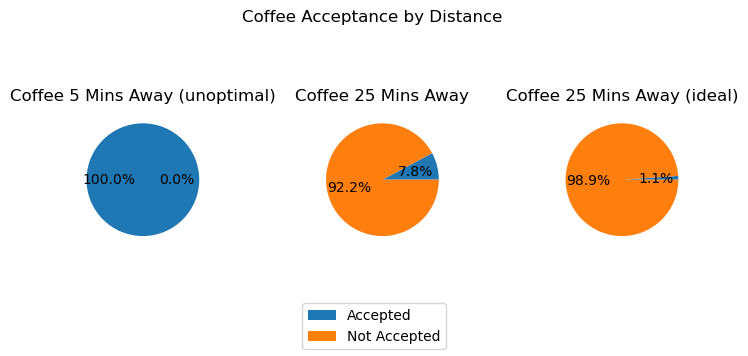

In [2077]:
coffee_acceptance_5_unoptimal = len(just_coffee[(just_coffee['toCoupon_GEQ5min'] == 1) & (just_coffee['temperature'] > 55) & (just_coffee['CoffeeHouse'].isin(['never', 'less1', '1~3'])) & (just_coffee['time'].isin(['2PM','6PM','10PM']))]) / total_coffee_rows
coffee_acceptance_25 = coffee_acceptance_25_min / total_coffee_rows
coffee_acceptance_25_min_ideal = len(just_coffee[(just_coffee['toCoupon_GEQ25min'] == 1) & (just_coffee['temperature'] <= 55) & (just_coffee['CoffeeHouse'].isin(['4~8', 'gt8'])) & (just_coffee['time'].isin(['7AM','10AM']))])/ total_coffee_rows

print(coffee_acceptance_5)

coffee_5_val = [coffee_acceptance_5, 1 - coffee_acceptance_5]
coffee_25_val = [coffee_acceptance_25, 1 - coffee_acceptance_25]
coffee_25_val_ideal = [coffee_acceptance_25_min_ideal, 1 - coffee_acceptance_25_min_ideal]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3.5))
pie1 = axes[0].pie(coffee_5_val, autopct="%1.1f%%")
pie2 = axes[1].pie(coffee_25_val, autopct="%1.1f%%")
pie3 = axes[2].pie(coffee_25_val_ideal, autopct="%1.1f%%")
axes[0].set_title(label="Coffee 5 Mins Away (unoptimal)")
axes[1].set_title(label="Coffee 25 Mins Away")
axes[2].set_title(label="Coffee 25 Mins Away (ideal)")
plt.subplots_adjust(hspace=0.5, wspace=0.7)
fig.suptitle("Coffee Acceptance by Distance")
fig.legend(('Accepted','Not Accepted'), loc="lower center")
plt.savefig("images/pie_chart_for_coffee_by_distance")
plt.show()



Even with the unoptimal conditions (doesn't go often, hot weather, late in the day), being only 5 minutes away out performs being 25 minutes away by a large margin (100% of people would go even with those conditions), whereas only 1.1% of people would still consider going (compared to 7.8% going 25 minutes for coffee regardless of other conditions). This goes to show that distance really is one of the biggest factors. While I didn't use all the variables that could influence a customer's decision, generally speaking, coffee is a very popular morning beverage, amplified if it's cold outside (who doesn't like a good warm cup of joe on a frigid morning?). 

With this information, we could tune how we provided coupons to customers, making the marketing of certain destinations more efficient. Just with this data alone, we can infer that the best time to market coffee (through coupons) would be earlier in the morning, and when the temperate is cooler.

### Next Steps

Again, we've only scratched the surface on how the various factors of the world influence our decision making. We explored a popular destination, and put in some rather opposite attributes to see how it would influence the outcome. We could further this analysis by more or less trying out various combinations of scenarios against the data. We should ask ourselves questions such as "What if I had a passenger?" or "Do I even really want this product right now?", and even taking into other subconcious thoughts like age or field of work, and seeing how they can influence our decisions.